# Grade: /100 Mark(s)

# Lab Assignment 02: Maximum Likelihood


### Maximum Likelihood

The poisson distribution https://en.wikipedia.org/wiki/Poisson_distribution is a discrete probability distribution often used to describe count-based data, like how many snowflakes fall in a day.

If we have count data $y$ that are influenced by a covariate or feature $x$, we can use the maximum likelihood principle to develop a regression model relating $x$ to $y$.




### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


In [1]:
#It's dangerous to go alone.  Take these!
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools import add_constant
from scipy.optimize import minimize
from scipy.special import gammaln



### Question 1: /10 Mark(s)

The negative log likelihood for a Poisson random variable is

$$\ell(\lambda; \mathbf{y}) = -\sum_{i=1}^N\Bigg( y_{i}\cdot \ln(\lambda) - \lambda - \ln(y_i!) \Bigg)$$

Here, $\mathbf{y}$ is a vector of counts and $\lambda$ is a scalar value.

Write a function called `poissonNegLogLikelihood` that takes a vector of counts $\mathbf{y}$ and a parameter $\lambda$ and returns the negative log likelihood.  The $\sum_{i} \ln(y_i!)$ does not affect the location of the maximum, and so you can omit the $ \ln(y_i!)$ in your function.


Test your function by calling it with `lam = 1.3` and `y=np.array([2,1,0,0])`.

What happens when you call the function when `lam=np.array([1,0.5,1,3])` and  `y=np.array([2,1,0,0])`? 

**Answer the following below in markdown: What happens when you set an element of lam to 0 or a negative number and why?**


In [2]:
def poissonNegLogLikelihood(lam,y):
    neg_log_lik = -np.sum(y * np.log(lam) - lam)
    return neg_log_lik

In [3]:
#lam = 1.3

In [4]:
lam=np.array([1,0.5,1,3])

In [5]:
y = np.array([2,1,0,0])

pNLL = poissonNegLogLikelihood(lam,y)
print(pNLL)

6.193147180559945


Write your answer here

---

Lets try it!

In [6]:
#lam=np.array([1,0,1,3])
#y=np.array([2,1,0,0])
#pNLL = poissonNegLogLikelihood(lam,y)
#print(pNLL)

In [7]:
#np.log(0)

In [8]:
#np.log(-1)

When I set the value of Lamda to [1,0,1,3] - giving it an element of 0 the value returned from the function `poissonNegLogLikelihood` is inf

---

**Remember: `a = ln(b) <=> 10^a = b`

---

when: b = 0:

a is undefined since no value of a can produce 0

However, since `np.log(0)` = `-inf`, the result of `-np.sum(y * np.log(lam) - lam)` = `-(-inf)` = `inf`

---

Additionally when b < 0:

if b < 0, a is undefined since no value of a can produce a number < 0
`np.log(-1)` = `nan`

### Question 2: /15 Mark(s)

Write a function called `poissonRegressionNegLogLikelihood` that takes as arguments a vector $\mathbf{y}$ of counts, a design matrix $\mathbf{X}$ of features for each count, and a vector $\mathbf{\beta}$ of parameters. The function should return the negative log likelihood of this dataset, assuming that each element of  $\mathbf{y}$ is independent and Poisson distributed with parameter $\lambda = \exp(\mathbf{X}\beta)$.

Hint: You can use `poissonNegLogLikelihood` in this answer!
Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`


In [9]:
def poissonRegressionNegLogLikelihood(b, X, y):
    lam = np.exp(X @ b)
    neg_log_lik = -np.sum(y * np.log(lam) - lam)
    return neg_log_lik


In [10]:
b = np.array([1,2])
X = np.array([[1,2,3],[2,3,1]]).T
y = np.array([0,2,10])

In [11]:
poissonRegressionNegLogLikelihood(b,X,y)

3211.7843052468816

### Question 3: /10 Mark(s)

a) In `poissonRegressionNegLogLikelihood`, why did we apply the exponential function to $\mathbf{X}\beta$?  Hint: Can an exponential ever be negative?

b) What might have happened had we just passed $\lambda = \mathbf{X}\beta$?

**Answer parts a) and b) below in this cell.  Write no more than 2 sentences per answer!**

---
a) I think this may have been for 2 reasons:
Since we are using log likelyhoods, it is important that the scale of $\lambda$ is appropriate

b) as shown above in question 1, if $\lambda$ is negative, log($\lambda$) will be `nan`. therefore, I believe we apply the exponential function to $\mathbf{X}\beta$ to ensure $\lambda$ is NOT negative

### Question 4: /5 Mark(s)

Write a function called `modelPrediction` which accepts as its first argument a vector of coefficents $\beta$ and a design matrix $\mathbf{X}$.  The function should return predictions of the form $\widehat{\mathbf{y}} = \exp(\mathbf{X}\beta)$. 

Hint: Numpy implements the exponential using `np.exp`.  

Test your function by calling it with 
* `b=np.array([1,2])`
* `X=np.array([[1,2,3],[2,3,1]]).T`

In [12]:
def modelPrediction(b,X):
    yhat = np.exp(X @ b)
    return yhat

In [13]:
b=np.array([1,2])
X=np.array([[1,2,3],[2,3,1]]).T

In [14]:
modelPrediction(b,X)

array([ 148.4131591 , 2980.95798704,  148.4131591 ])

### Question 5: /15 Mark(s)

Write a function called `fitModel` which accepts as its first argument argument a design matrix $\mathbf{X}$ and as its second argument a vector of outcomes counts $\mathbf{y}$. The function should return the maximum likelihood estimates for the coefficients of a Poisson regression of $\mathbf{y}$ onto $\mathbf{X}$.

Test your function by calling it with 
* `X=np.array([[1,2,3],[2,3,1]]).T`
* `y=np.array([0,2,10])`

**What is your estimated b?**

In [15]:
def fitModel(X,y):
    beta_start = np.ones((X.shape[1], 1))
    mle = minimize(poissonRegressionNegLogLikelihood,beta_start,(X,y))
    betas = mle.x
    return betas

In [16]:
X=np.array([[1,2,3],[2,3,1]]).T
y=np.array([0,2,10])

Estimated b:

In [17]:
print(fitModel(X,y))

[ 0.94827558 -0.52953525]


### Question 6: /20 Mark(s)

Load in the data from `poisson_regression_data.csv`. Plot a scatterplot of the data. Fit a poisson regression to this data using the functions you wrote above.  Plot the model predictions over $x \in [-2,2]$ on the same graph as the scatterplot of the data.  

/Users/joelmiller/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'x vs y')

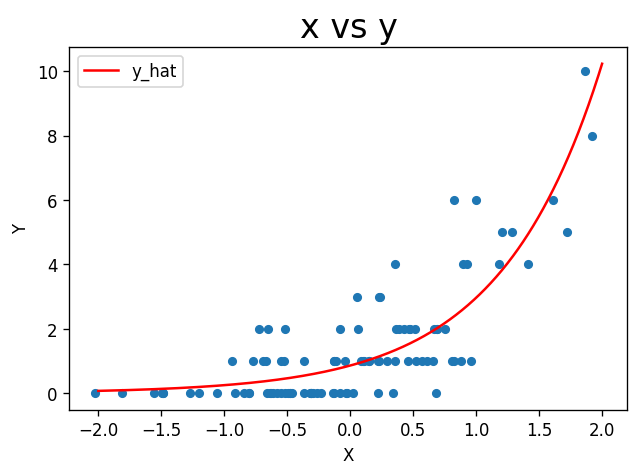

In [60]:
poisson_data = pd.read_csv('poisson_regression_data.csv')

fig, ax = plt.subplots(dpi = 120)

x = poisson_data.x.values 
X = np.c_[np.ones(x.size), x]
y= poisson_data.y.values

betas = fitModel(X,y)

newx = np.linspace(-2,2,1001)
newX = np.c_[np.ones(newx.size), newx]

y_predicted = modelPrediction(betas, newX)

poisson_data.plot.scatter(x='x', y='y',ax=ax)
ax.plot(newx, y_predicted, c = 'red', label='y_hat')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.title("x vs y", fontsize=20)

### Question 7:  /20 Mark(s)

Now apply linear regression (ordinary least squares) to the data, obtain parameter estimates and plot the predictions over the same range.  Feel free to use `statsmodels` to fit the linear regression.

/Users/joelmiller/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


Text(0.5, 1.0, 'x vs y')

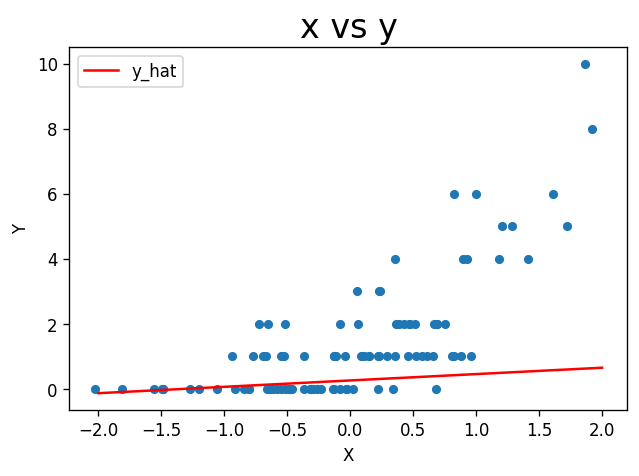

In [62]:
poisson_data = pd.read_csv('poisson_regression_data.csv')

x = poisson_data.x.values 
X = np.c_[np.ones(x.size),x]
y = poisson_data.y.values

ols_fit = sm.OLS(X, y)
ols_params = ols_fit.fit().params[0]

y_pred = newx*ols_params[1] + ols_params[0]

# Plot a scatter plot of the data and your model's predictions
fig, ax = plt.subplots(dpi = 120)
poisson_data.plot.scatter(x='x', y='y',ax=ax)
ax.plot(newx, y_pred, c = 'red', label="y_hat")
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.title("x vs y", fontsize=20)

### Question 8: /5 Mark(s)

a) Do you see any major problems with the predictions from linear regression? Keep in mind that this model is intended to model counts of things. Provide your answer below in markdown in fewer than 5 sentences.

---

a) Yes, I see major problems with the predections from linear regression, since the goal of linear regression is to minimize the global cost it drew a line through the highest concentration of variables, and missed the overall trend of the data. 



### Follow These Instructions

Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.